left
12558
0.5706973671913147


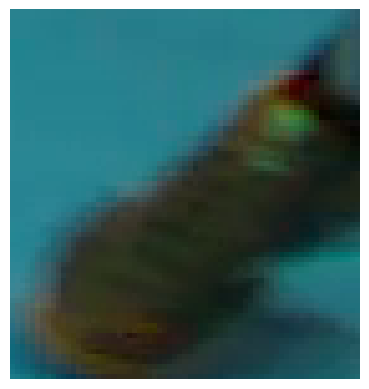

left
12559
0.562504768371582


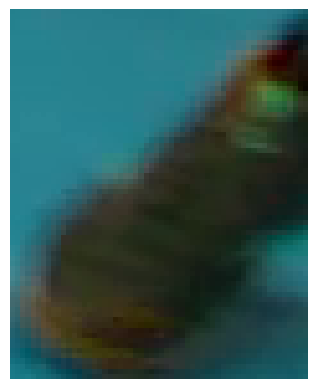

left
12560
0.752282440662384


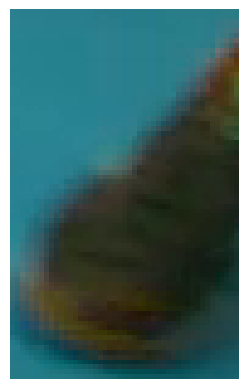

left
12561
0.7259327173233032


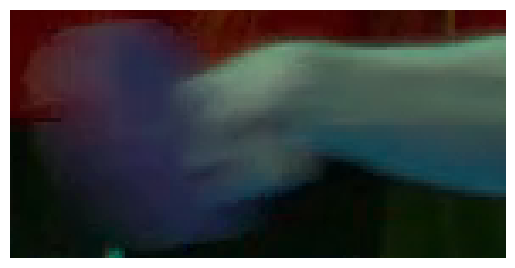

left
12562
0.4178737998008728


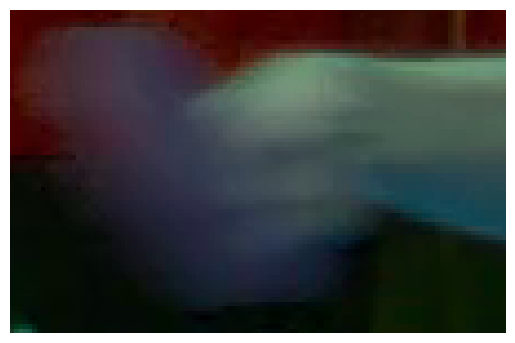

left
14458
0.8155690431594849


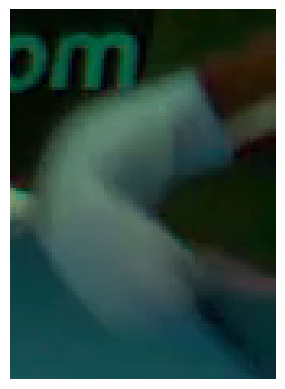

left
14459
0.1174787059426307


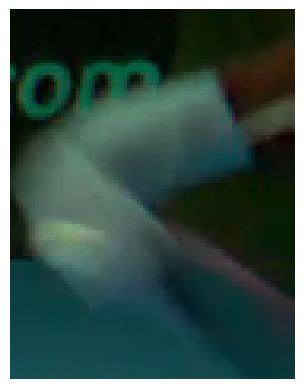

left
14460
0.3588201105594635


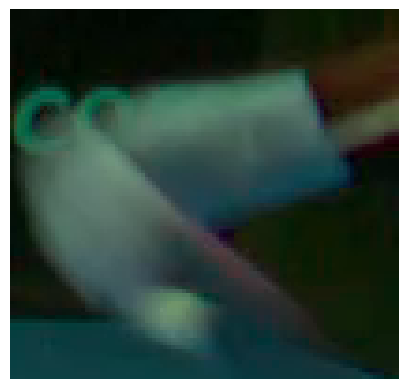

left
14461
0.2171142250299453


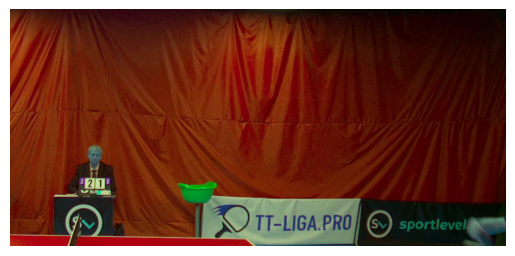

left
14462
0.1358299106359481


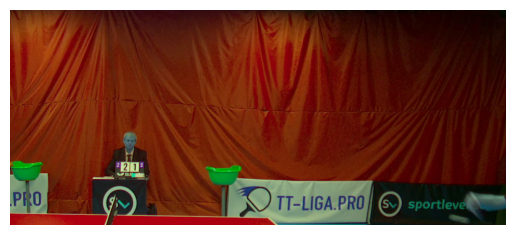

left
14503
0.1784047037363052


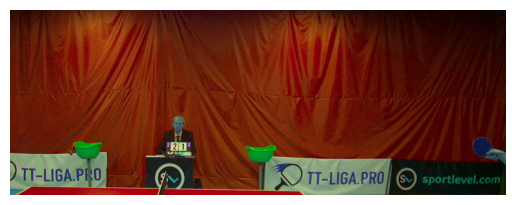

left
14504
0.3031876385211944


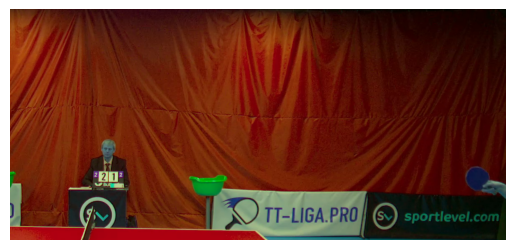

left
14505
0.3558081686496734


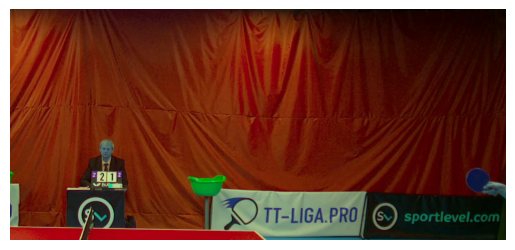

left
14506
0.2077762186527252


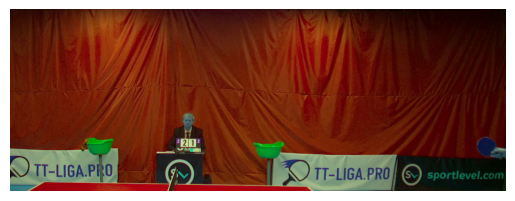

left
14507
0.1829321533441543


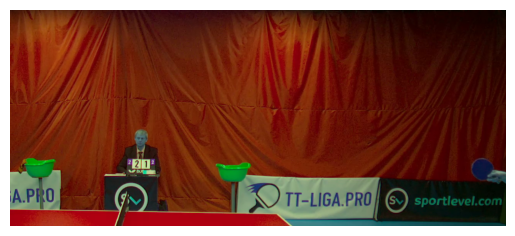

left
14628
0.3711549639701843


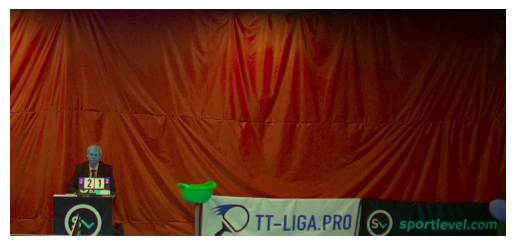

left
14629
0.1705339401960373


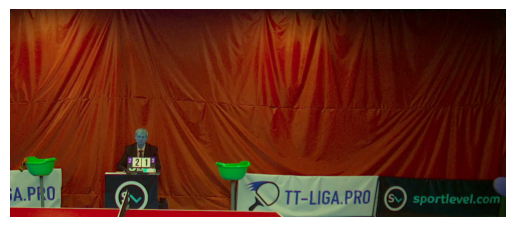

left
14630
0.2524476647377014


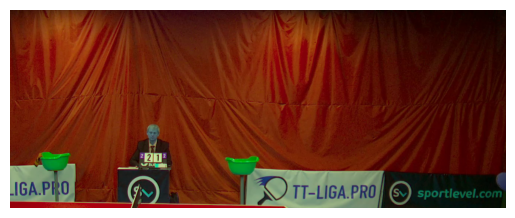

left
14631
0.2860884368419647


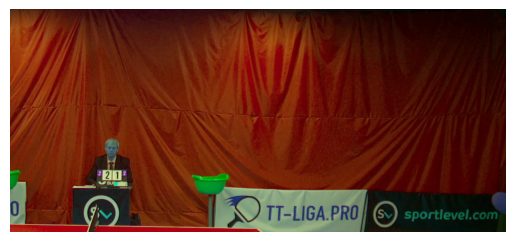

left
14632
0.2872589230537414


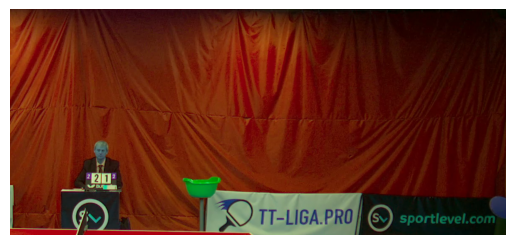

left
14714
0.5454006195068359


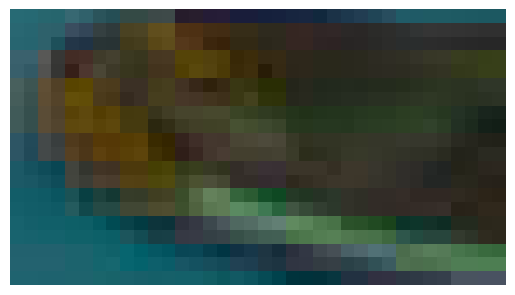

left
14715
0.2911075353622436


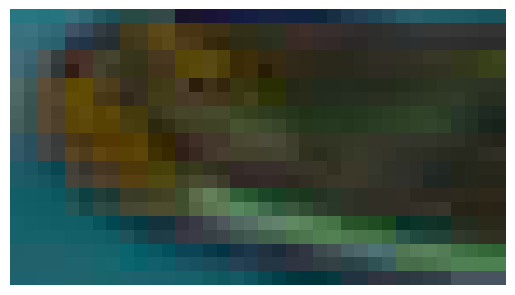

left
14716
0.2247672975063324


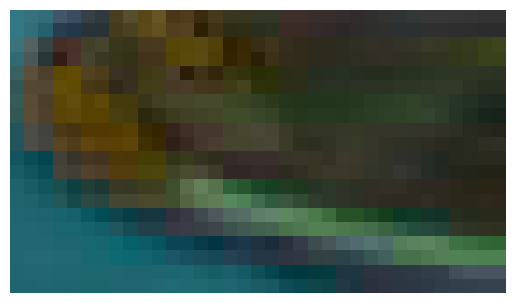

left
14717
0.388597697019577


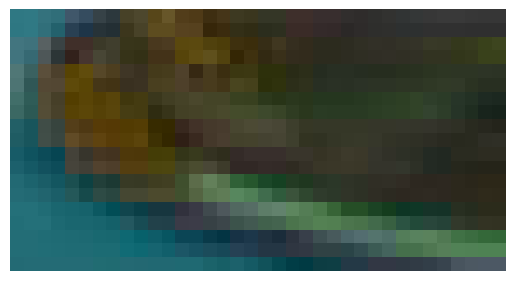

left
14718
0.4513081312179565


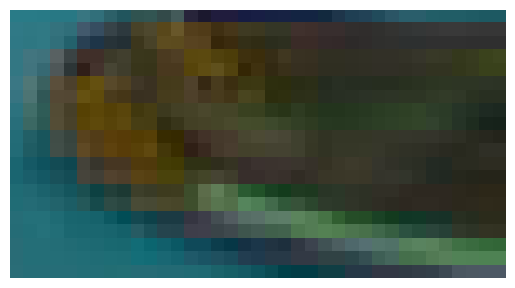

left
14795
0.2319303005933761


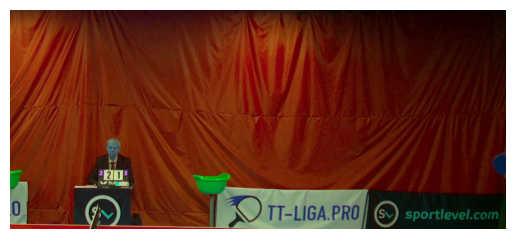

left
14796
0.2633863985538482


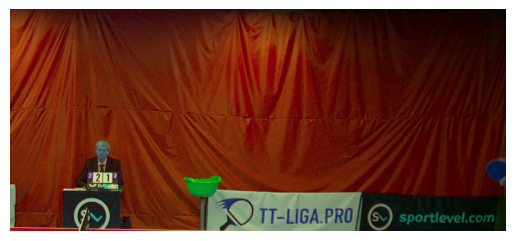

left
14797
0.383092850446701


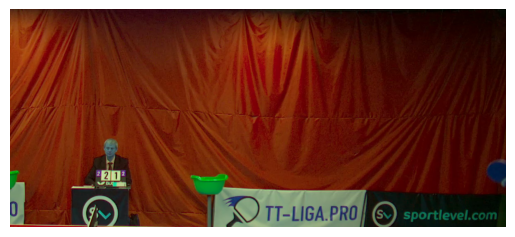

left
14798
0.2037713080644607


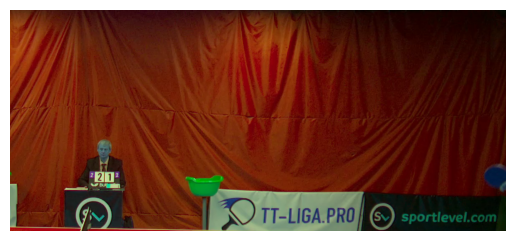

left
14799
0.3063044846057892


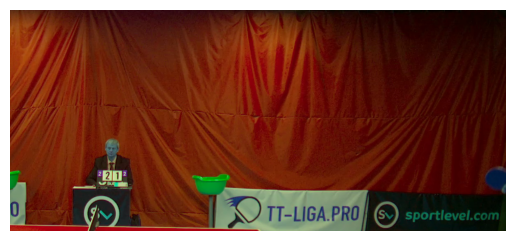

left
14895
0.1536505669355392


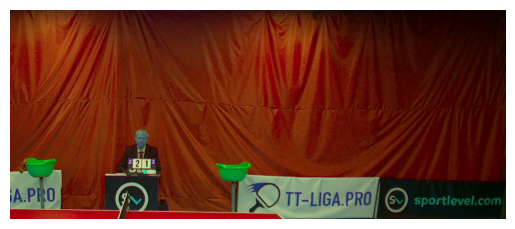

left
14896
0.2319776713848114


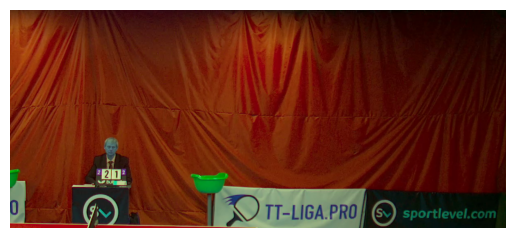

left
14897
0.3095854520797729


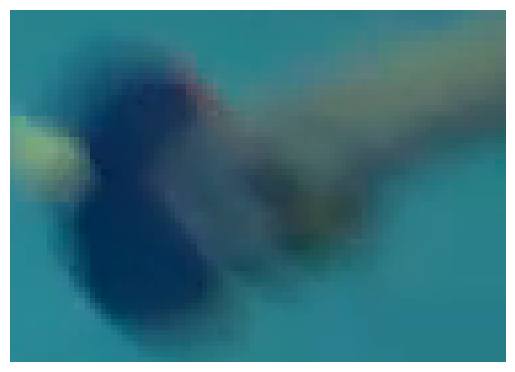

left
14898
0.2913042902946472


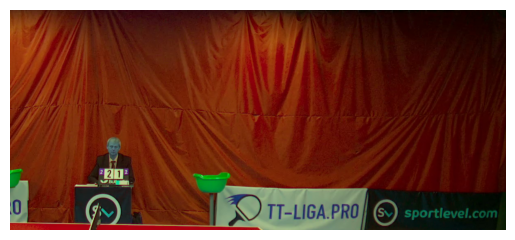

left
14899
0.2213972210884094


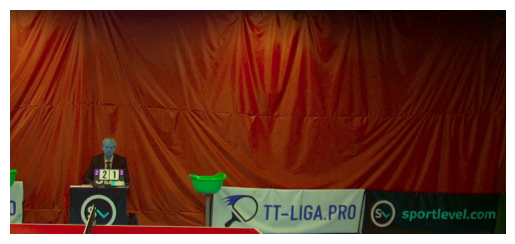

left
14989
0.2405535280704498


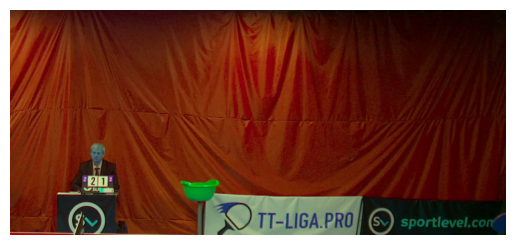

left
14990
0.2771112024784088


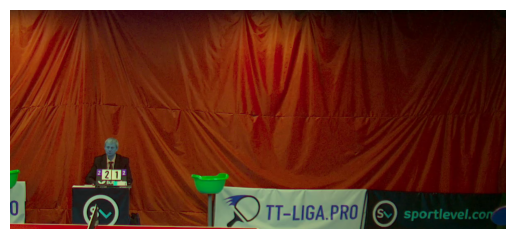

left
14991
0.3250707685947418


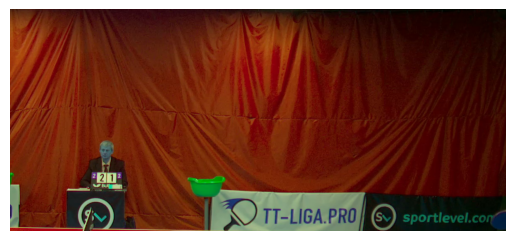

left
14992
0.2754997014999389


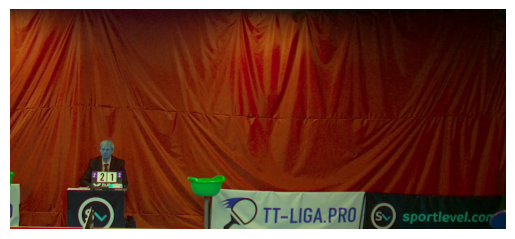

left
14993
0.2246933132410049


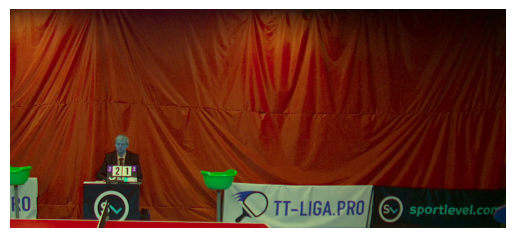

right
18755
0.0499531924724578


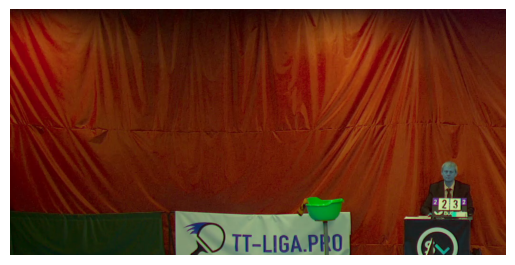

right
18756
0.0127989929169416


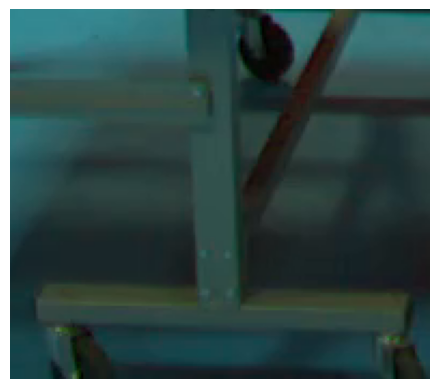

right
18757
0.0392960160970687


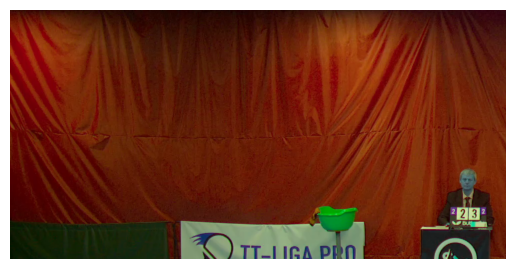

right
18758
0.0105485683307051


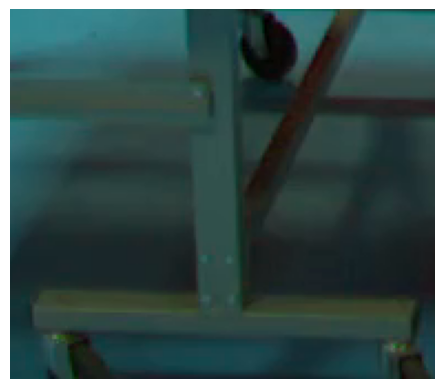

right
18759
0.0687730237841606


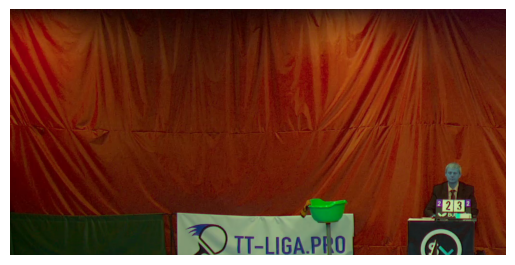

right
18769
0.0612077452242374


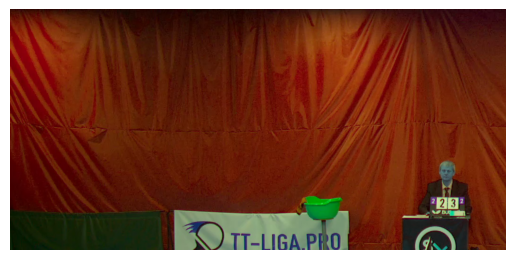

right
18771
0.1673592031002044


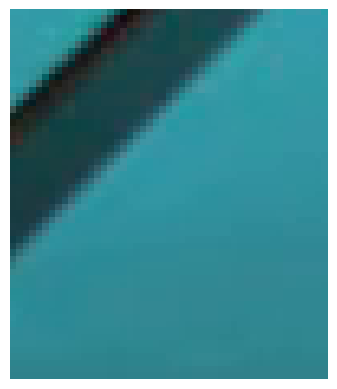

right
18773
0.0382754579186439


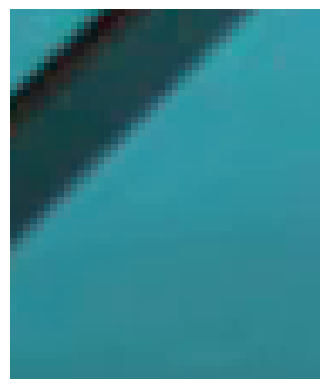

right
22490
0.0247096251696348


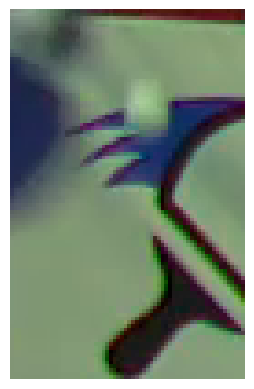

right
22492
0.0150120686739683


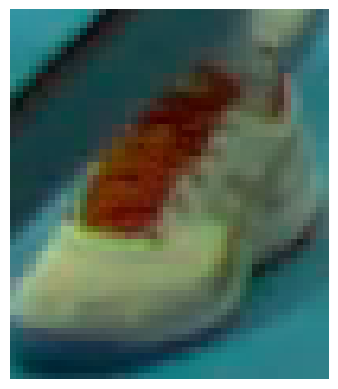

right
36528
0.7724844813346863


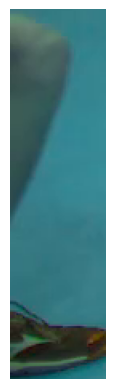

right
47092
0.8391798734664917


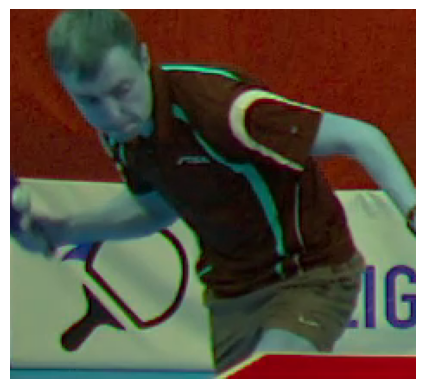

52


In [9]:
import pandas as pd
import ast
import cv2
import matplotlib.pyplot as plt

# Load CSV file
file_path = "../midpoints.csv"
df = pd.read_csv(file_path)

video_path = "../videos/game_1.mp4"
cap = cv2.VideoCapture(video_path)

def get_player_boxes(df):
    left_player_boxes = []
    right_player_boxes = []
    frames = []
    left_scores = []
    right_scores = []
    
    
    for _, row in df.iterrows():
        left_bboxes = ast.literal_eval(row["Left bbox"])
        right_bboxes = ast.literal_eval(row["Right bbox"])
        left_score = row["Left score"]
        right_score = row["Right score"]
        event_frames = row["Event frame"]
        sequence_frames = row["Sequence frame"]
        
        left_player_boxes.append(left_bboxes)
        right_player_boxes.append(right_bboxes)
        frames.append(event_frames + sequence_frames)
        left_scores.append(left_score)
        right_scores.append(right_score)
    
    return left_player_boxes, right_player_boxes, frames, left_scores, right_scores
    

def save_crops(left_bboxes, right_bboxes, frames, left_scores, right_scores):
    counter = 0
    thresh = 0.9
    for i in range(len(left_bboxes)):        
        cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
        _, frame = cap.read()
    
        x1, y1, x2, y2 = left_bboxes[i]
        x1, x2 = x1 * 1920, x2 * 1920
        y1, y2 = y1 * 1080, y2 * 1080
        
        cropped_img_left = frame[int(y1):int(y2), int(x1):int(x2)]    

        x1, y1, x2, y2 = right_bboxes[i]
        x1, x2 = x1 * 1920, x2 * 1920
        y1, y2 = y1 * 1080, y2 * 1080
        
        cropped_img_right = frame[int(y1):int(y2), int(x1):int(x2)]
        
        if left_scores[i] < thresh:
            print("right")
            counter += 1
            print(frames[i])
            print(left_scores[i])
            plt.imshow(cropped_img_left)
            plt.axis('off')  # Hide the axis
            plt.show()  # Show the image
            
        if right_scores[i] < thresh:
            print("left")
            counter += 1
            print(frames[i])
            print(right_scores[i])
            plt.imshow(cropped_img_right)
            plt.axis('off')  # Hide the axis
            plt.show()  # Show the imag
        
    print(counter)
        
        #cv2.imwrite(f"{frame_directory}/{player}.png", cropped_img)

    
left_bboxes, right_bboxes, frames, ls, rs = get_player_boxes(df)
save_crops(left_bboxes, right_bboxes, frames, ls, rs)